In [1]:
import os
import cv2
import itertools as it
from tqdm import tqdm_notebook as tqdm
import numpy as np
from matplotlib import pyplot as plt


from impl import *

In [2]:
images_dir = "E:/Bobst/Images"
images_paths = ["{d}/{f}".format(d=images_dir, f=f) for f in os.listdir(images_dir)]

In [3]:
images = [cv2.imread(p, 0) for p in tqdm(images_paths[1650:1660])]

In [148]:
template = images[0]

In [150]:
type(template[0, 0])

numpy.uint8

In [436]:
aligned_images = [align(img, template) for img in tqdm(images)]

In [438]:
def mask_contour(img, perc=0.98):
    cnt = contour(img)
    full_mask = np.zeros(template.shape, dtype=np.uint8)
    tmp1 = cv2.drawContours(full_mask, [cnt], 0, 255, -1)
    w, h = tmp1.shape
    tmp2 = cv2.resize(tmp1, (int(h * perc), int(w * perc)), interpolation=cv2.INTER_AREA)
    tmp3 = np.zeros_like(tmp1)
    smaller_w, smaller_h = tmp2.shape
    w_dif = w - smaller_w
    h_dif = h - smaller_h
    tmp3[w_dif // 2:smaller_w + w_dif // 2, h_dif // 2:smaller_h + h_dif // 2] = tmp2
    mask = tmp3 // 128
    return img * mask

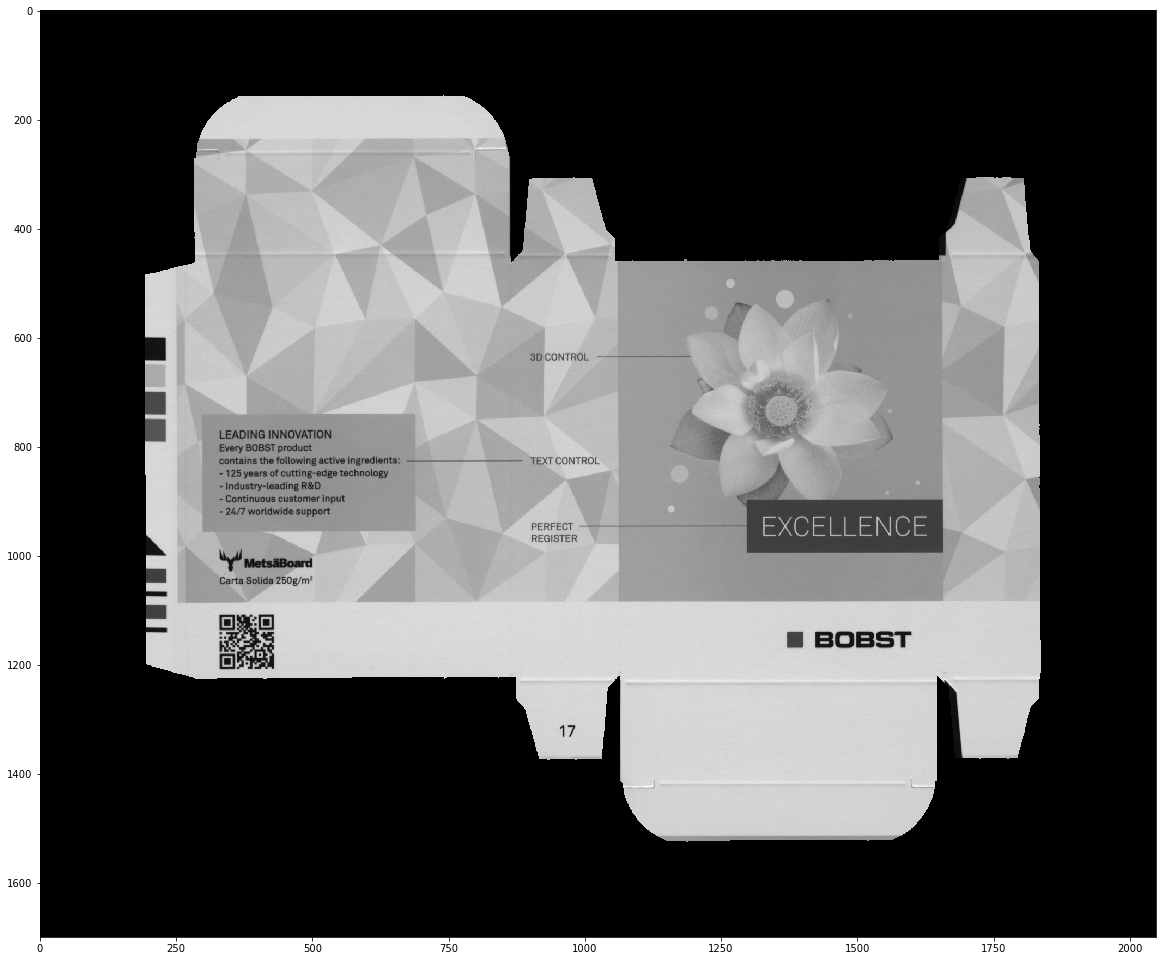

In [439]:
show(mask_contour(template))

In [316]:
cnt = contour(template)
full_mask = np.zeros(template.shape, dtype=np.uint8)
tmp1 = cv2.drawContours(full_mask, [cnt], 0, 255, -1)

In [317]:
tmp1.dtype

dtype('uint8')

In [318]:
np.min(tmp1), np.max(tmp1)

(0, 255)

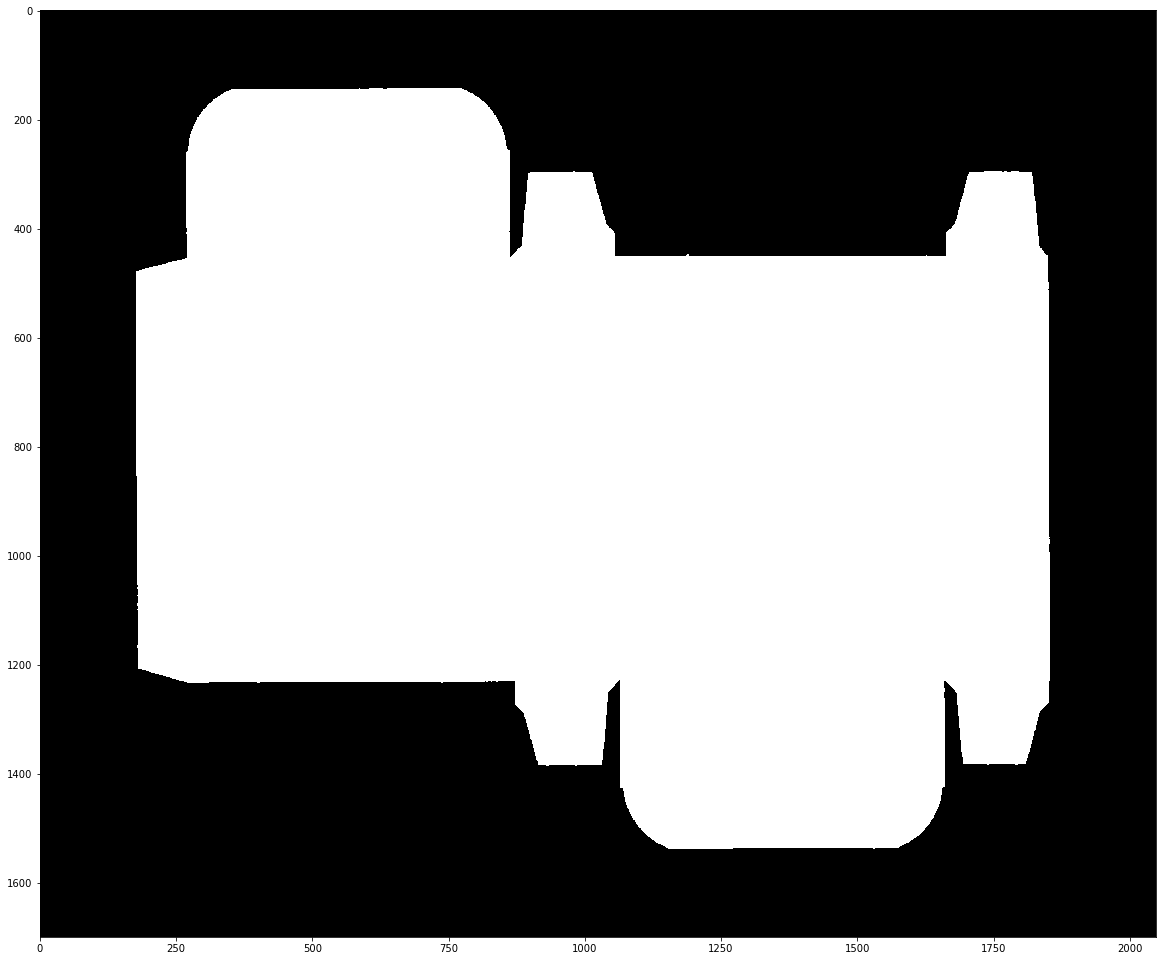

In [319]:
show(tmp)

In [416]:
perc = .98
w, h = tmp1.shape
print(w, h)
print(int(h * perc), int(w * perc))
tmp2 = cv2.resize(tmp1, (int(h * perc), int(w * perc)), interpolation=cv2.INTER_AREA)
tmp2.dtype

1700 2048
2007 1666


dtype('uint8')

In [417]:
np.max(tmp2)

255

In [418]:
tmp2.shape

(1666, 2007)

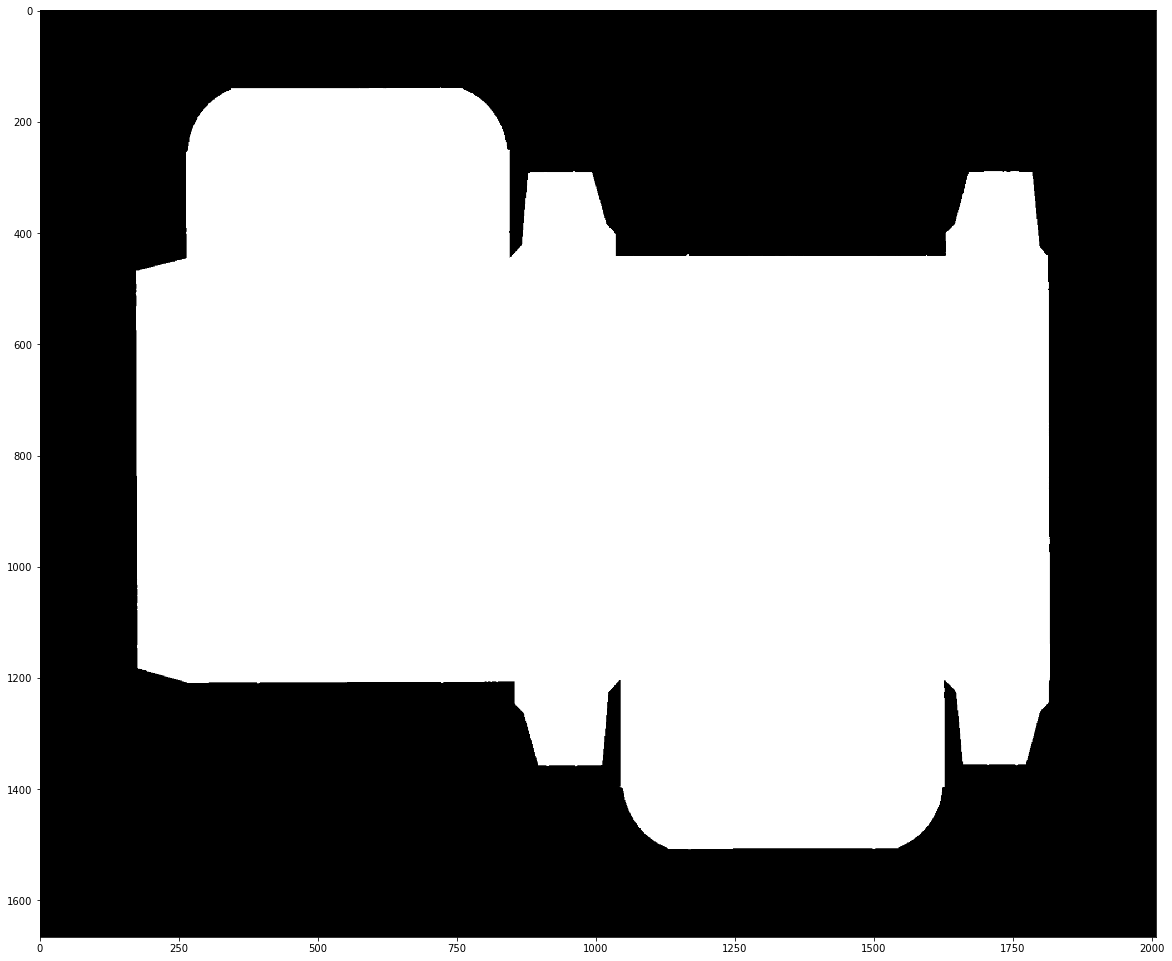

In [419]:
show(tmp2)

In [420]:
tmp3 = np.zeros_like(tmp1)
smaller_w, smaller_h = tmp2.shape
w_dif = w - smaller_w
h_dif = h - smaller_h

tmp3[w_dif // 2:smaller_w + w_dif // 2, h_dif // 2:smaller_h + h_dif // 2] = tmp2

In [421]:
w_dif // 2, smaller_w + w_dif // 2

(17, 1683)

In [422]:
tmp3.dtype

dtype('uint8')

In [428]:
np.max(tmp3 // 128)

1

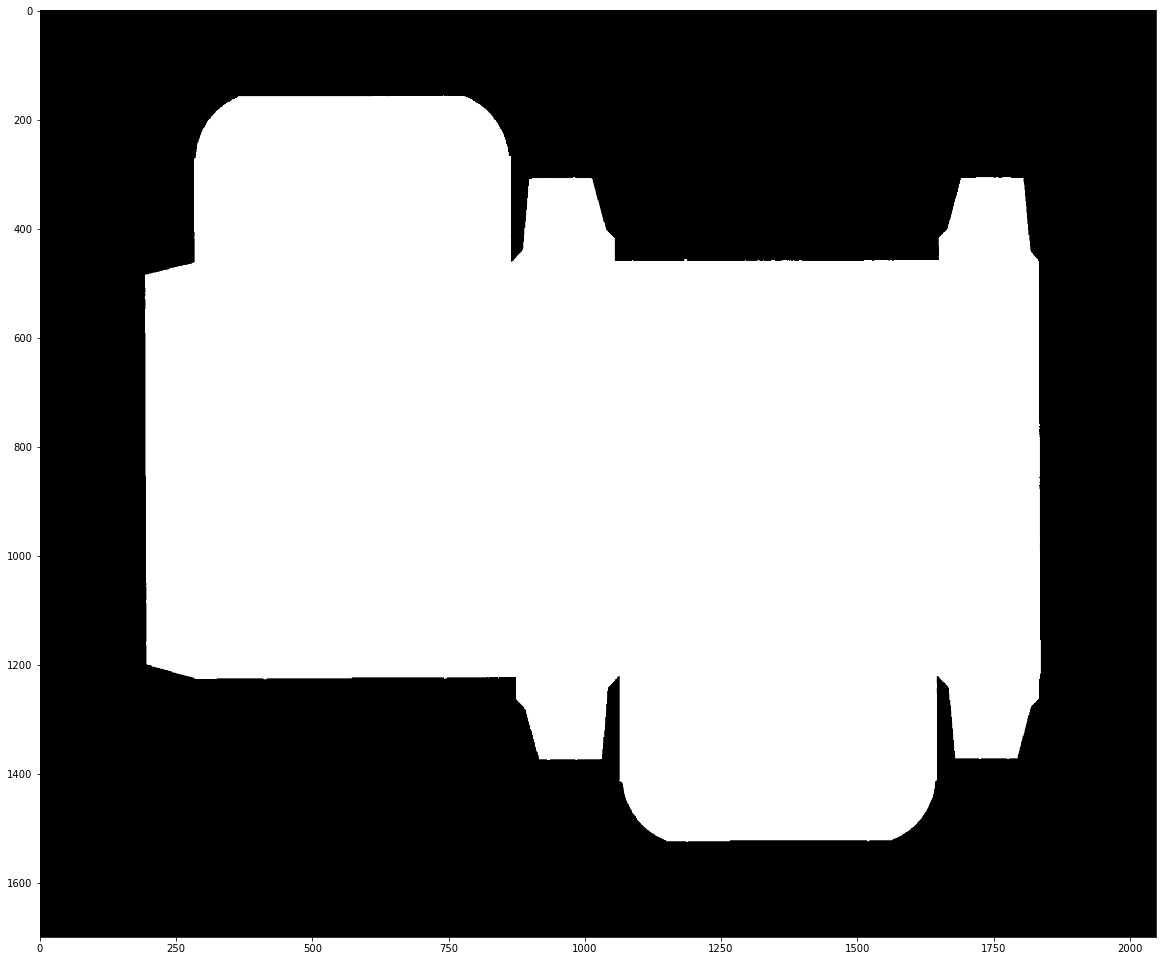

In [424]:
show(tmp3)

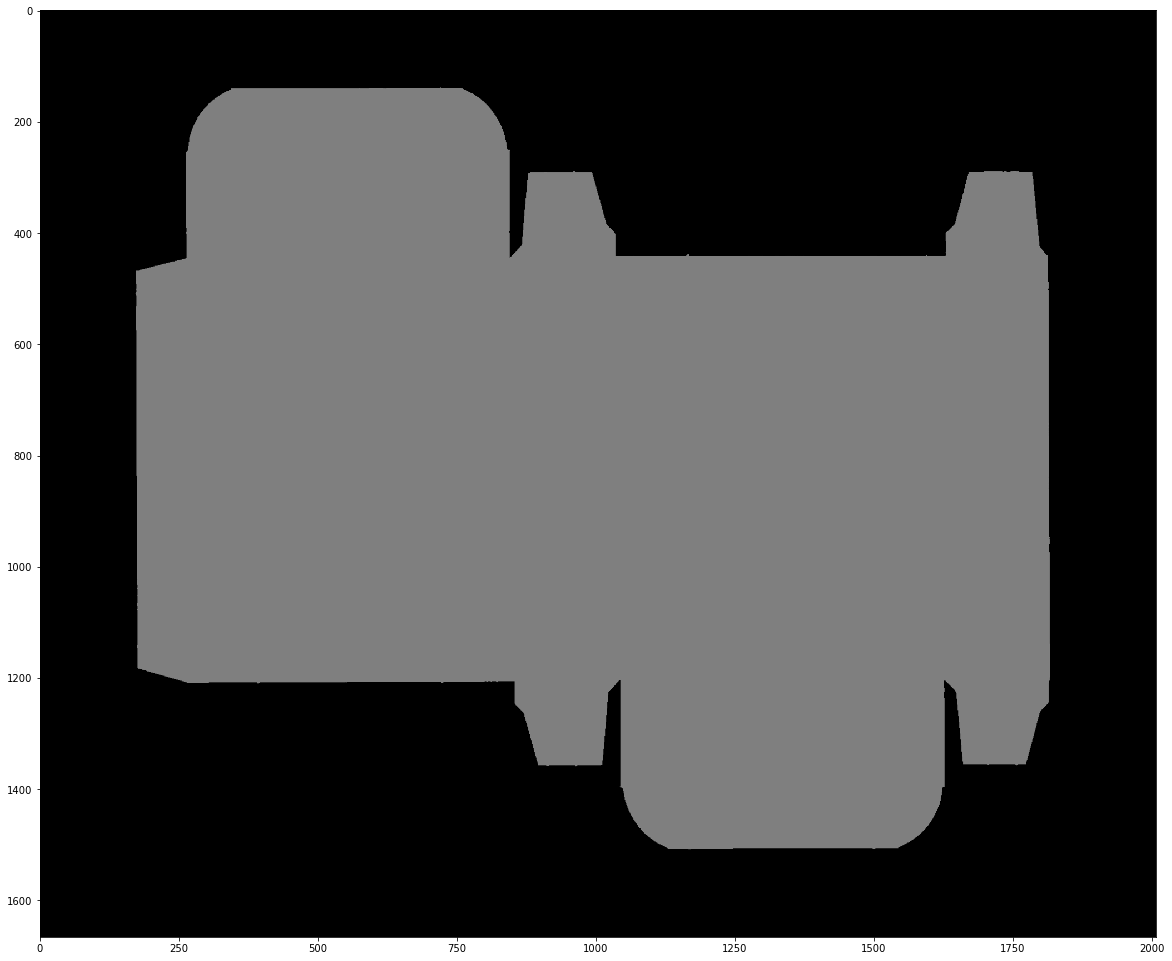

In [425]:
show(tmp2 // 2)

In [244]:
np.min(tmp3 // 4)

0

In [431]:
mask = tmp3 // 128

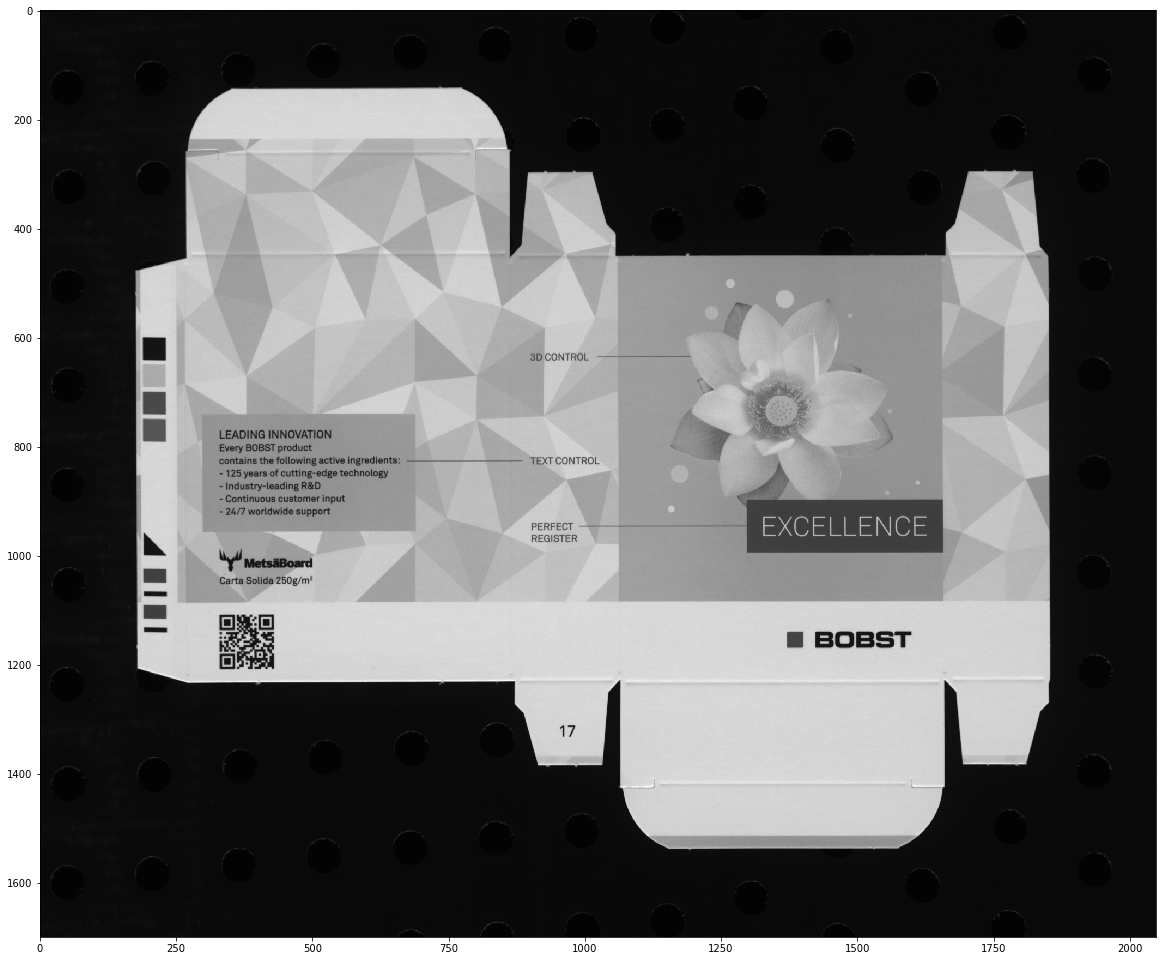

In [432]:
show(template)

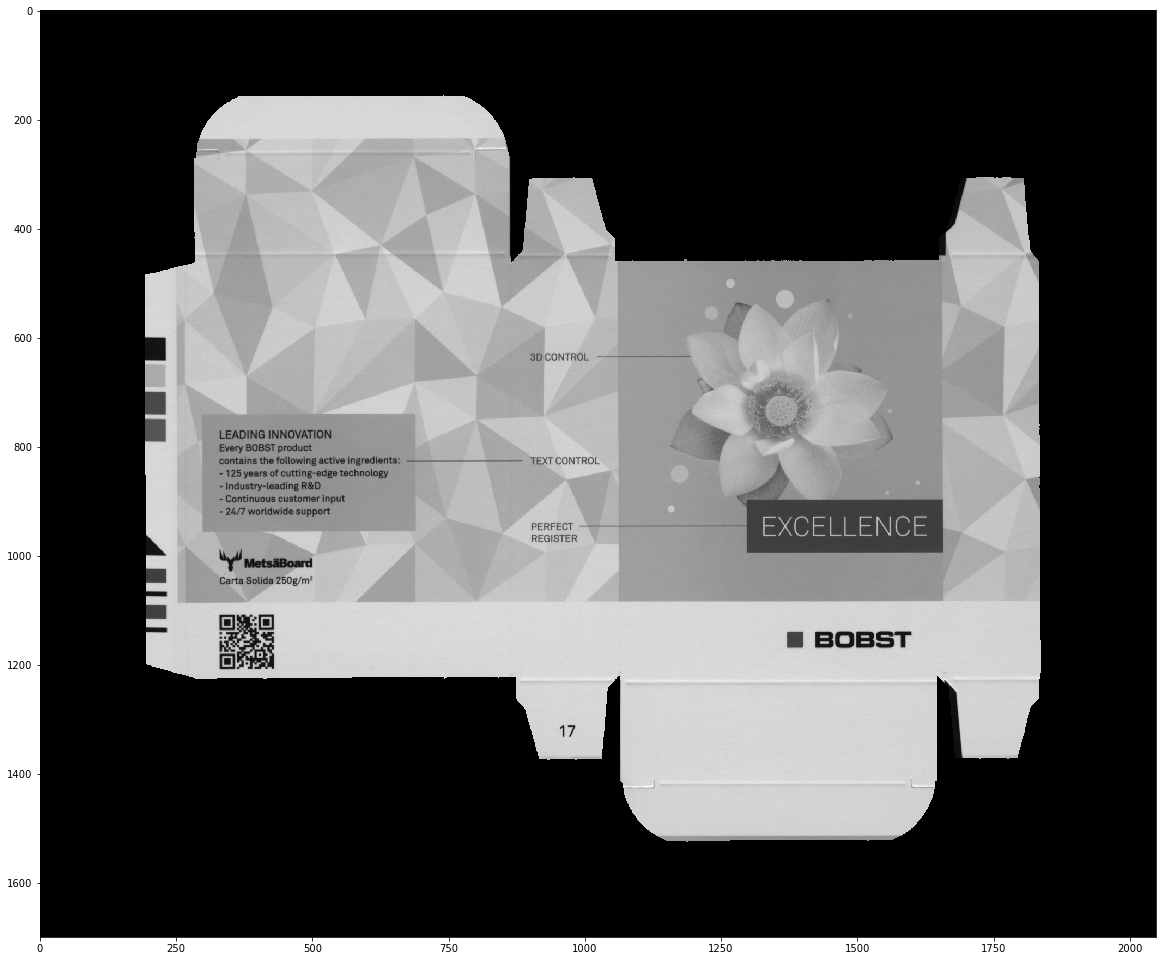

In [435]:
show(template * (mask))

In [241]:
np.max(tmp3)

127

In [240]:
cv2.imwrite("E:\Bobst\tmp_1.jpg", tmp1)
cv2.imwrite("E:\Bobst\tmp_3.jpg", tmp3)

False

In [6]:
std = np.std(aligned_images, axis=0)
std.shape

(1700, 2048)

In [7]:
mean = np.mean(aligned_images, axis=0)
mean.shape

(1700, 2048)

In [238]:
cv2.imwrite("E:\mean.jpg", mean)
cv2.imwrite("E:\std.jpg", std)

True

In [9]:
#img_p = align(cv2.imread(images_paths[891], 0))

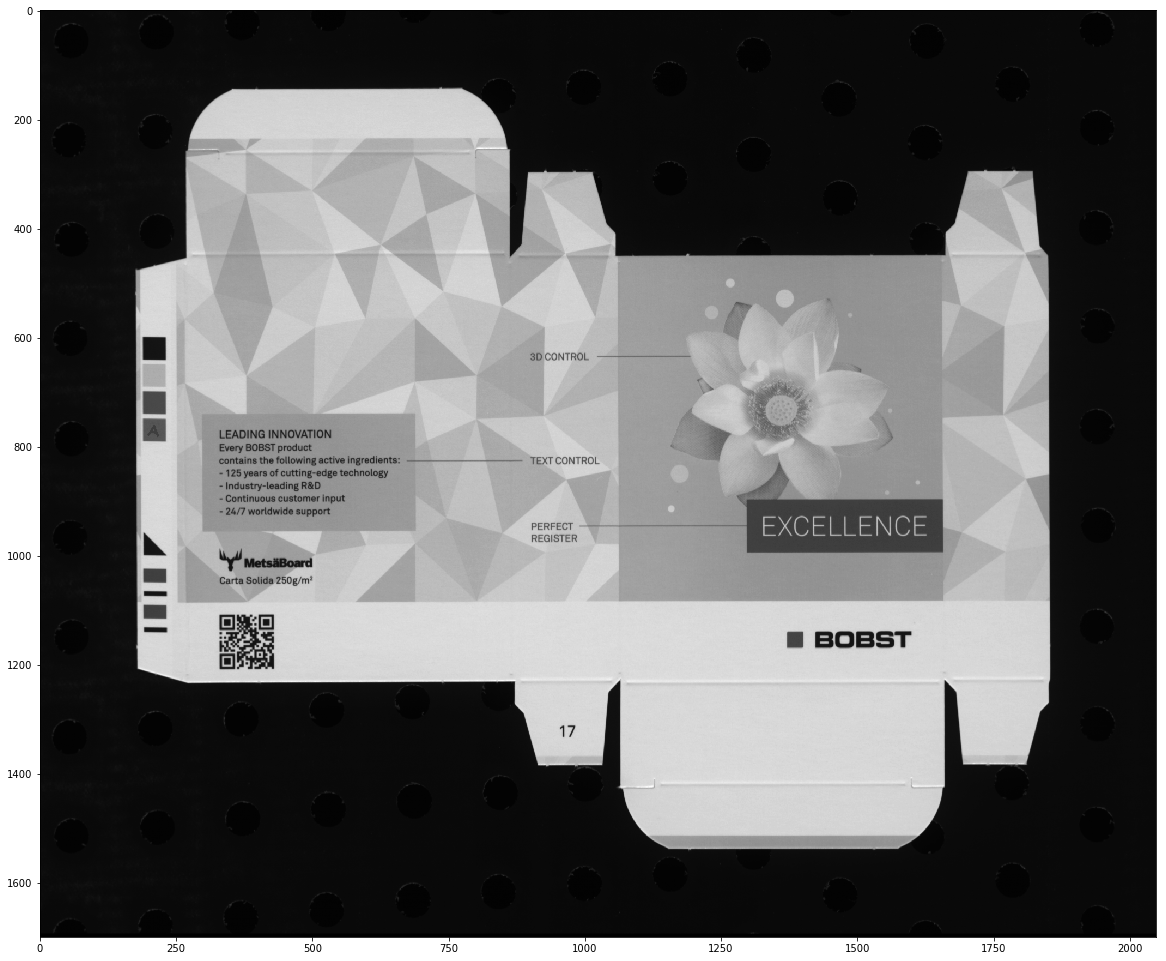

In [10]:
show(aligned_images[7])

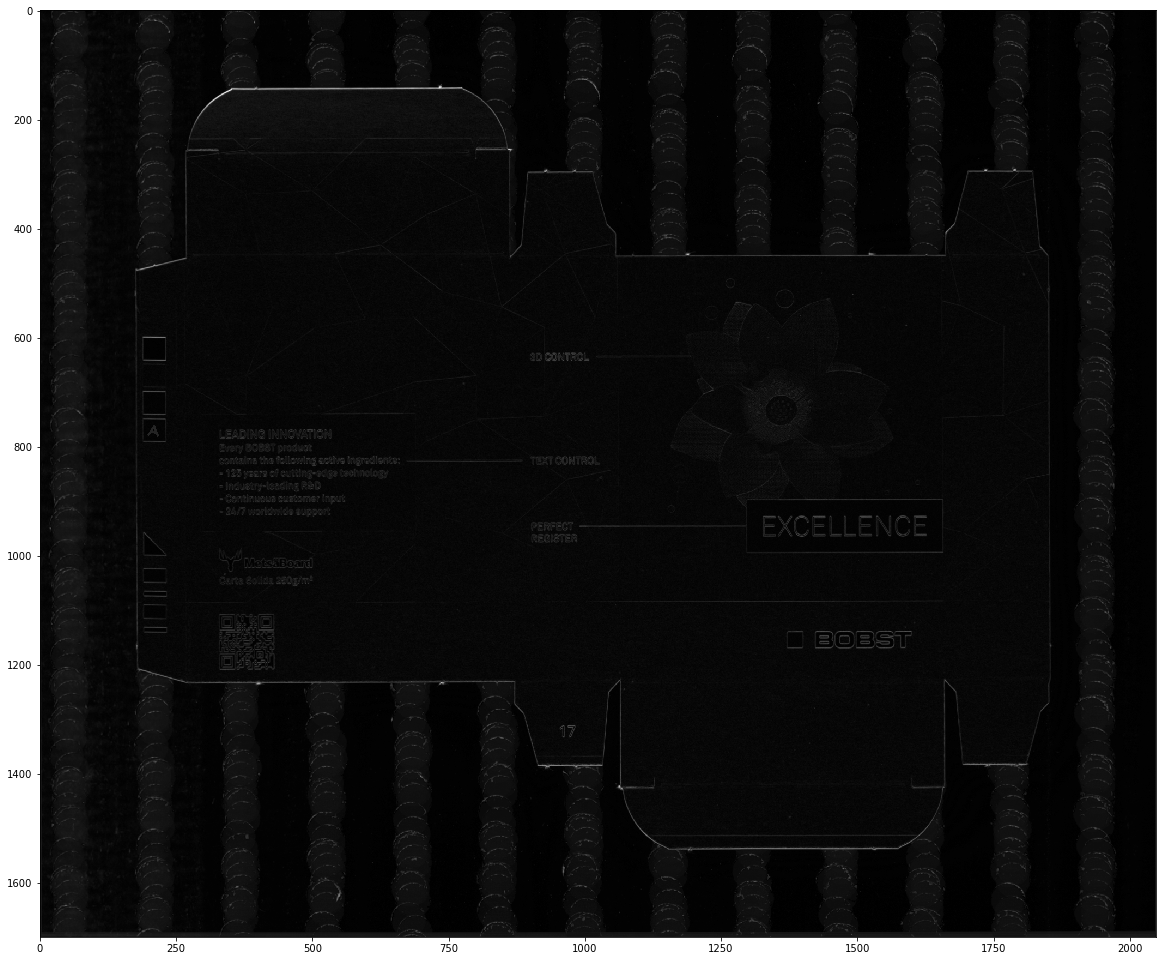

In [11]:
show(std)

In [12]:
dif = mean - aligned_images[7]

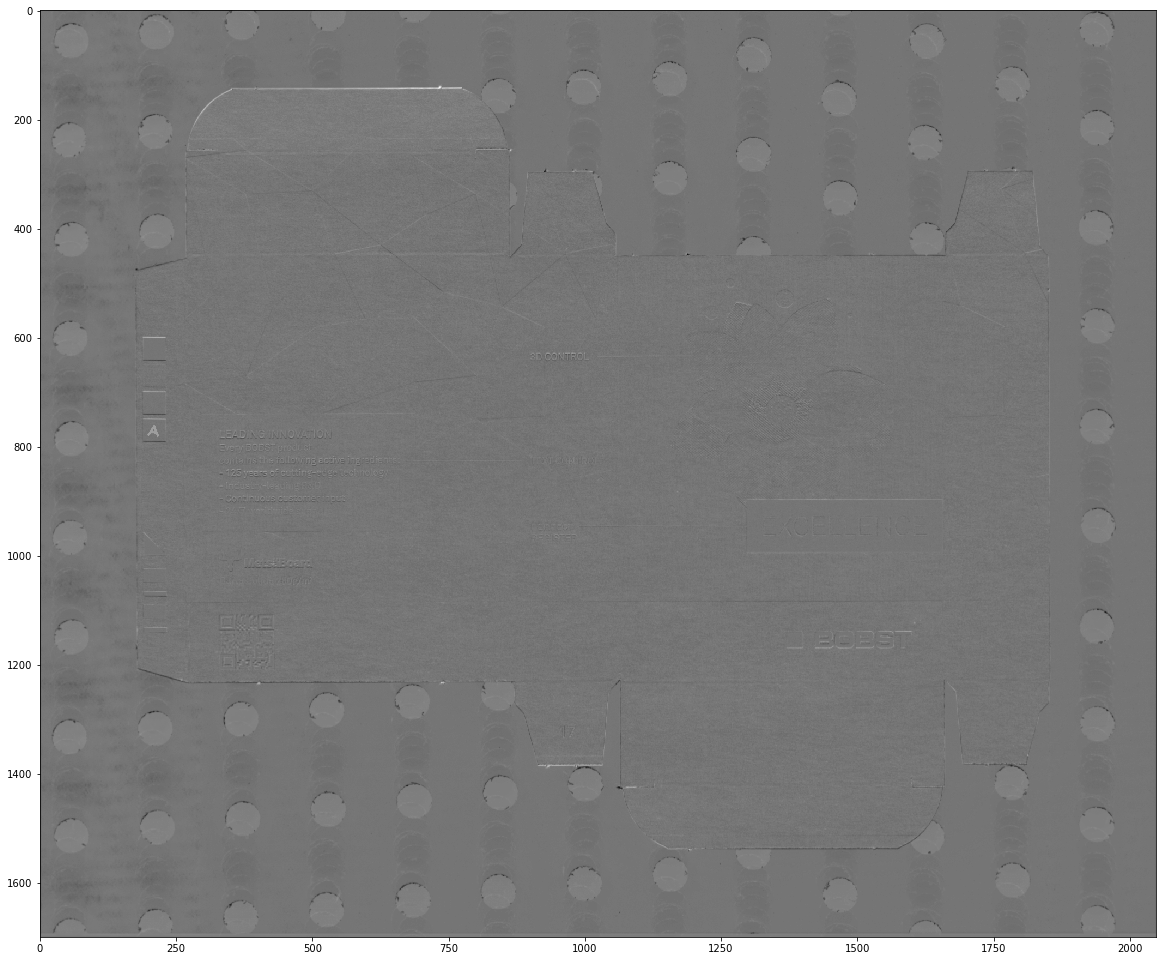

In [13]:
show(dif)

In [14]:
dif_contrast = contrast(dif, 15)

In [15]:
np.max(dif_contrast)

255

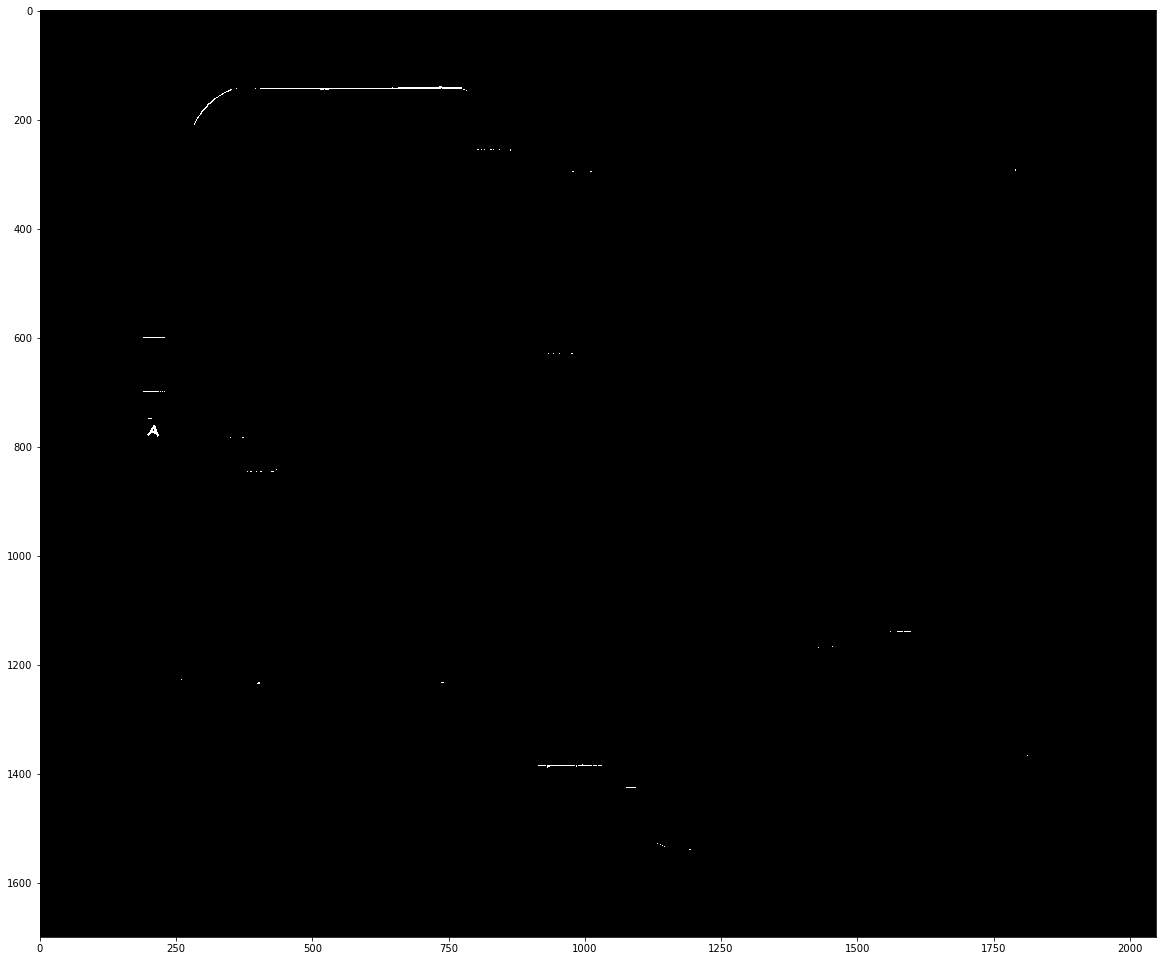

In [16]:
show(dif_contrast) 

In [ ]:
(dif == 0).sum()

In [ ]:
cv2.imwrite("E:\dif_p.jpg", (dif > 0) * dif)

In [ ]:
dif.shape, dif[0, 0]

In [ ]:
dif_constrast = (dif > 50) * 255 # * dif

In [ ]:
(dif_constrast > 0).sum()

In [ ]:
cv2.imwrite("E:\dif_p_contrast.jpg", dif_constrast)

In [ ]:
np.nonzero(std - std2)

In [ ]:
orb = cv2.ORB_create()
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [ ]:
kp_des = [orb.detectAndCompute(img,None) for img in tqdm(aligned_images)]

In [ ]:
combinations = list(it.combinations(range(len(kp_des)), 2))

In [ ]:
all_matches = [bf.match(kp_des[i][1], kp_des[j][1]) for i,j in tqdm(combinations)]

In [ ]:
distances = [np.sum([m.distance for m in matches]) for matches in all_matches]

In [ ]:
np.argsort(distances)

In [ ]:
np.max(distances), np.min(distances)

In [ ]:
idx = np.argsort(distances)[0]
distances[idx], combinations[idx]

In [ ]:
img_idx1 = combinations[idx][0]
img_idx2 = combinations[idx][1]

kp1 = kp_des[img_idx1][0]
kp2 = kp_des[img_idx2][0]

matches = all_matches[idx]

img1 = aligned_images[img_idx1]
img2 = aligned_images[img_idx2]

In [ ]:
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches, None, flags=2)

In [ ]:
plt.figure(figsize=(20, 20))
plt.imshow(img3)
plt.show()

In [ ]:
dif = cv2.subtract(img1, img2)

In [ ]:
dif2 = cv2.subtract(resized_img[0], resized_img[1])

In [ ]:
cv2.imwrite("E:\dif2.jpg", dif2)

In [ ]:
plt.figure(figsize=(20, 15))
plt.imshow(dif2)
plt.show()

In [ ]:
img = cv2.imread(pictures[0])
img_cropped = crop_contour(img)

cv2.imwrite("E:\diff.jpg", img_cropped)

In [ ]:
mask = np.zeros_like(im) + 255 # Create mask where white is what we want, black otherwise
cv2.drawContours(mask, cnt, idx, 255, -1) # Draw filled contour in mask
out = np.zeros_like(im) # Extract out the object and place into output image
out[mask == 255] = im[mask == 255]

cv2.imwrite("E:\diff.jpg", out)

In [ ]:
def draw_contour(img):
    img = img.copy()
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    _, thresh = cv2.threshold(img_gray,127,255,0)
    
    _, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt = max(contours, key = cv2.contourArea)
    
    cv2.drawContours(img, [cnt], 0, (0,255,0), 3)
    return img

In [ ]:
img = cropped_images[1]#draw_contour(images[-4])

plt.figure(figsize=(20, 20))
plt.imshow(img)
plt.show()

In [ ]:
im1 =  cv2.imread(images_paths[0]);
im2 =  cv2.imread(images_paths[1]);

cropped1 = crop_contour(im1)
cropped2 = crop_contour(im2)

min_shape = get_min_width_height([cropped1, cropped2])

resized1 = cv2.resize(cropped1, min_shape)
resized2 = cv2.resize(cropped2, min_shape)

cv2.imwrite("E:\img_resized1.jpg", resized1)
cv2.imwrite("E:\img_resized2.jpg", resized2)

In [ ]:
# Read the images to be aligned
img2 =  cv2.imread(images_paths[2]);
 
img2_aligned = align(img)

cv2.imwrite("E:\img1.jpg", img_template)
cv2.imwrite("E:\img2.jpg", img2)
cv2.imwrite("E:\img_aligned.jpg", img2_aligned)

In [21]:
def contour(img):
    
    _, thresh = cv2.threshold(img,127,255,0)
    
    _, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = max(contours, key = cv2.contourArea)
    
    return cnt

In [277]:

def show(img):
    plt.figure(figsize=(20, 20))
    plt.imshow(img, cmap='gray', vmin = 0, vmax = 255)
    plt.show()